O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).

Já o boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filmes = pd.read_csv(r'C:\Users\Jones\Desktop\Estudos Python\Alura\Data Science analise e visualização de dados\Alura_CienciaDados\aula0\ml-latest-small\movies.csv')
notas = pd.read_csv(r'C:\Users\Jones\Desktop\Estudos Python\Alura\Data Science analise e visualização de dados\Alura_CienciaDados\aula0\ml-latest-small\ratings.csv')
tmdb = pd.read_csv(r'C:\Users\Jones\Desktop\Estudos Python\Alura\Data Science analise e visualização de dados\Alura_CienciaDados\aula0\tmdb_5000_movies.csv')

In [5]:
filmes.columns = ['filmesId', 'titulo', 'genero']
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [8]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [19]:
medias_por_filme = notas.groupby("filmeId").mean()['nota']
medias_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

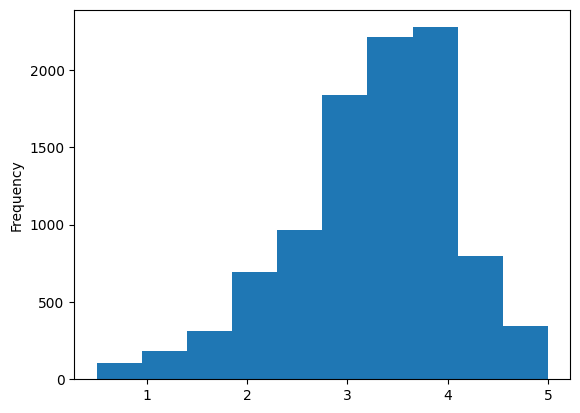

In [14]:
medias_por_filme.plot(kind="hist")

C:\Users\Jones\AppData\Local\Temp\ipykernel_25588\2874113155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<AxesSubplot:xlabel='nota', ylabel='Density'>

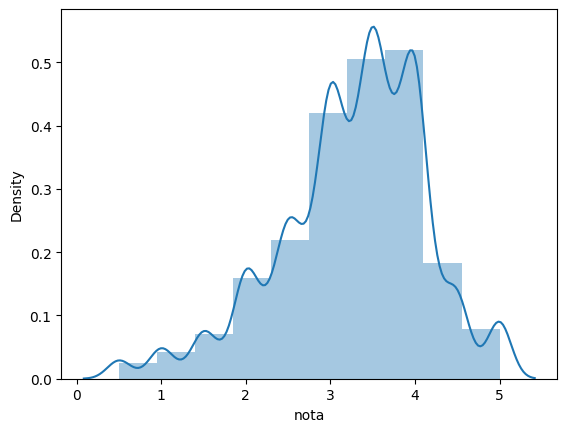

In [22]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias por filme')

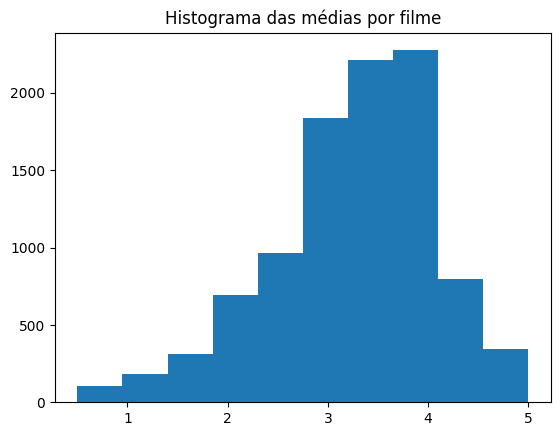

In [25]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias por filme")

In [4]:
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [6]:
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau -> categoria ordinal

# budget, orçamento ->quantitativo continuo

In [8]:
#Aqui temos umas série
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [10]:
contagem_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_linguas.columns = ['original_language','total']
contagem_linguas.head(2)

,original_language,total
0,en,4505
1,fr,70


<AxesSubplot:xlabel='original_language', ylabel='total'>

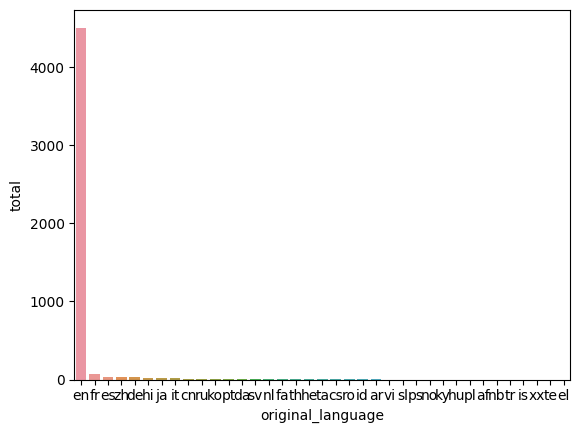

In [11]:
sns.barplot(data = contagem_linguas, x='original_language', y='total')

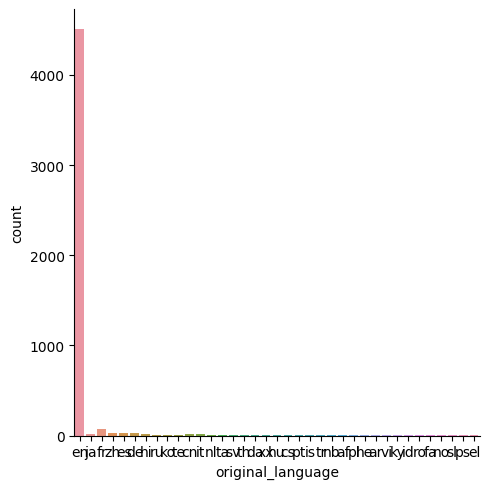

In [13]:
sns.catplot(x= "original_language", kind = "count", data = tmdb)